In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples
n_samples=1000

In [3]:
#Create Labels and Features
X,y=make_circles(n_samples,noise=0.03,random_state=42)

Lets Visualize the data as it is hard to understand

In [4]:
import pandas as pd 

In [5]:
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Visualize it with  a Plot 

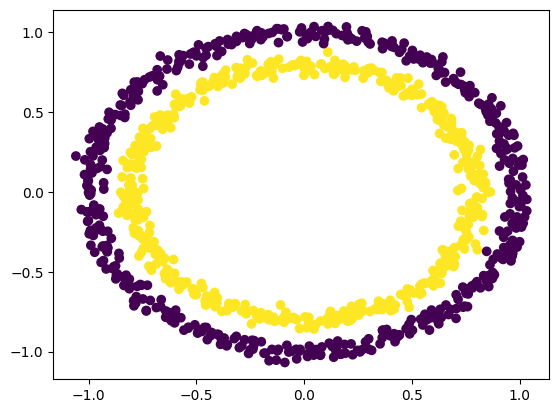

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(circles["X0"],circles["X1"],c=y)
plt.show()

Second Way of Visualization

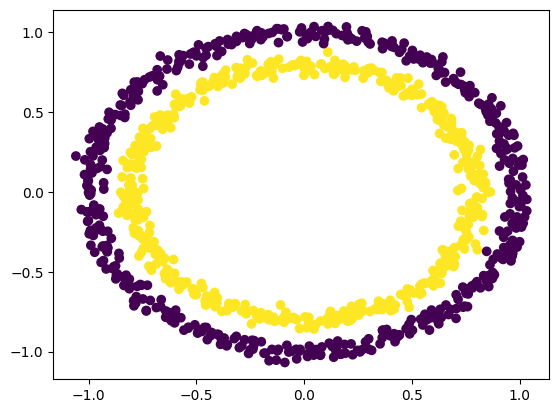

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

Model Creation


In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)
# Model 1 
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=5,verbose=0)

In [12]:
model1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 0.6937


[0.6936528086662292, 0.4909999966621399]

Improve model by introducing a hidden a layer

In [13]:
tf.random.set_seed(42)
# Model 2 
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=100,verbose=0)

In [14]:
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4900 - loss: 0.6936


[0.6935944557189941, 0.49000000953674316]

Again Try to improve again by changing optimizer , increasing hidden units and layers

In [15]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100,verbose=0)

In [16]:
model3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4920 - loss: 0.6942


[0.6942413449287415, 0.492000013589859]

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):

    # Define axis boundraies for of the plot and create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
    y_min,y_max=X[:,1].min()+0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    # Create X value to make predictions on these
    x_in=np.c_[xx.ravel(),yy.ravel()]   # Stacks 2d array together

    # Make Predictions
    y_pred=model.predict(x_in)
    
    # check for multi-class 
    if len(y_pred[0])>1:
        print('You are doing multi-class classification')
        # Reshape Predictions to get ready for plotting 
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing Binary Classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    # Plot Decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


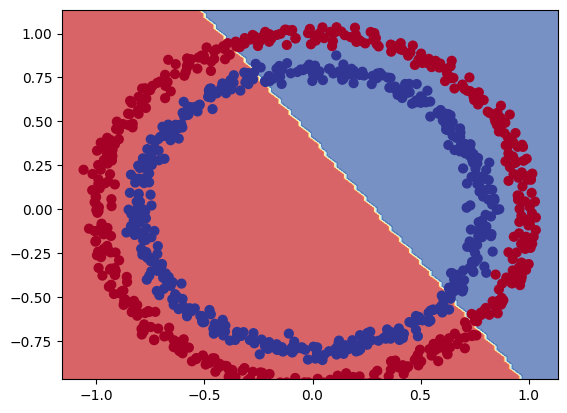

In [19]:
plot_decision_boundary(model3,X,y)